# Drawing Conclusions Quiz
Use the space below to explore `store_data.csv` to answer the quiz questions below.

In [17]:
# imports and load data
import pandas as pd

df = pd.read_csv('store_data.csv')
df.head()

week  storeA  storeB  storeC  storeD  storeE
0  2014-05-04    2643    8257    3893    6231    1294
1  2014-05-11    6444    5736    5634    7092    2907
2  2014-05-18    9646    2552    4253    5447    4736
3  2014-05-25    5960   10740    8264    6063     949
4  2014-06-01    7412    7374    3208    3985    3023

In [18]:
# explore data
df.info()

df['week'] = pd.to_datetime(df['week'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
week      200 non-null object
storeA    200 non-null int64
storeB    200 non-null int64
storeC    200 non-null int64
storeD    200 non-null int64
storeE    200 non-null int64
dtypes: int64(5), object(1)
memory usage: 9.5+ KB


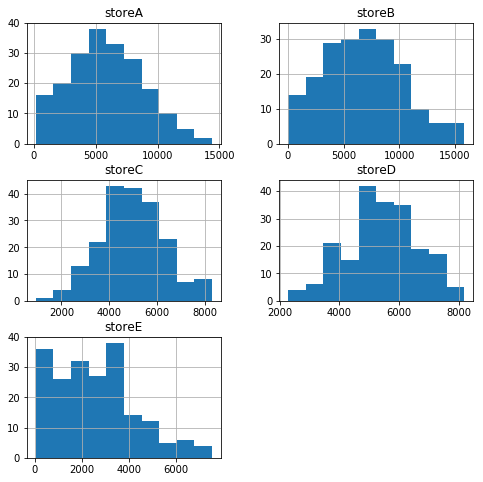

In [105]:
# explore data
df.hist(figsize=(8, 8));

In [43]:
# create a cross table of total grouped by year and month

summary = df.groupby([df['week'].dt.year, df['week'].dt.month]).sum()
summary.tail()

storeA  storeB  storeC  storeD  storeE
week week                                        
2017 10     32299   44731   20535   27545    9435
     11     29748   27601   21520   25219    6914
     12     40688   29151   30198   28422    8509
2018 1      21776   25648   19893   23985   11038
     2      25127   24595   16447   22783    7787

In [39]:
# total sales for the last month

# get the sum of the last row
summary[-1:].values.sum()

96739

In [93]:
# average sales

# index using iloc and exclude the week columns
avg_sale_for_all_stores = df.iloc[:,1:].values.mean()

# avg sale each store
df.mean()

storeA    5865.480
storeB    6756.710
storeC    4942.105
storeD    5431.405
storeE    2580.025
dtype: float64

In [96]:
# sales on march 13, 2016

# filter the dataframe to specified week
df[df['week']== 'march 13, 2016']

week  storeA  storeB  storeC  storeD  storeE
97 2016-03-13    2054    1390    5112    5513    2536

In [86]:
# worst week for store C
df[df['storeC'] == df['storeC'].min()]

week  storeA  storeB  storeC  storeD  storeE
9 2014-07-06    8567    3228     927    3277     168

In [103]:
# total sales during most recent 3 month period

three_month_per = summary[-3:]

# Which store has the most sales in the latest 3-month period?
three_month_per.sum().idxmax()

'storeA'